# E-Signing of Loan Based on Financial History with ANN

## Step. 1 Problem Statement

Lending companies work by analyzing the financial history of their loan applicants and choosing whether or not the applicant is too risky to be given a loan. If the applicant is not, the company determines the terms of the loan. To acquire these applicants, companies can organically receive them through their websites/apps, often with the help of advertisement campaigns. Other times, lending companies partner with peer-to-peer(P2P) lending marketplaces, to acquire leads of possible applicants. Some example marketplaces include Upstart, Lending Tree, and Learning Club. In this project, we are going to assess the 'quality' of the leads our company receives from the marketplaces.
- __Market__: The target audience is the set of loan applicants who reached out through an intermediary marketplace.
- __Product__: Loan
- __Goal__: Develop a model to predict for 'quality' applicants. In this project, 'quality' applicants are those who reach a key part of the loan application process.

## Step 2. Exploratory Data Analysis

### Importing Libararies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [2]:
dataset = pd.read_csv('dataset/Financial-Data.csv')

In [3]:
# displaying firts 10 rows
dataset.head(10)

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
5,8492423,21,weekly,0,2303,0,5,8,2,7,...,600,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1
6,7948313,26,bi-weekly,0,2795,0,4,4,1,6,...,800,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1
7,4297036,43,bi-weekly,0,5000,0,2,1,1,2,...,1100,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1
8,6493191,32,semi-monthly,0,5260,3,0,3,1,4,...,1150,64050,0.652429,0.802433,0.593816,0.560389,0.569459,0.369459,3,1
9,8908605,51,bi-weekly,1,3055,0,6,11,4,2,...,600,59750,0.624666,0.968565,0.509919,0.749624,0.758607,0.758607,5,1


In [4]:
# list of columns
dataset.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [5]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


### Cleaning the Data

In [6]:
# if any column have any kind of null value
dataset.isna().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

## Step 3. Visualizing Dataset

In [7]:
# deleting unwanted columns from the dataset
dataset2 = dataset.drop(columns=['entry_id','pay_schedule','e_signed'])

In [8]:
dataset2.head()

,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
0,40,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10
1,61,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9
2,23,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7
3,40,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8
4,33,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12


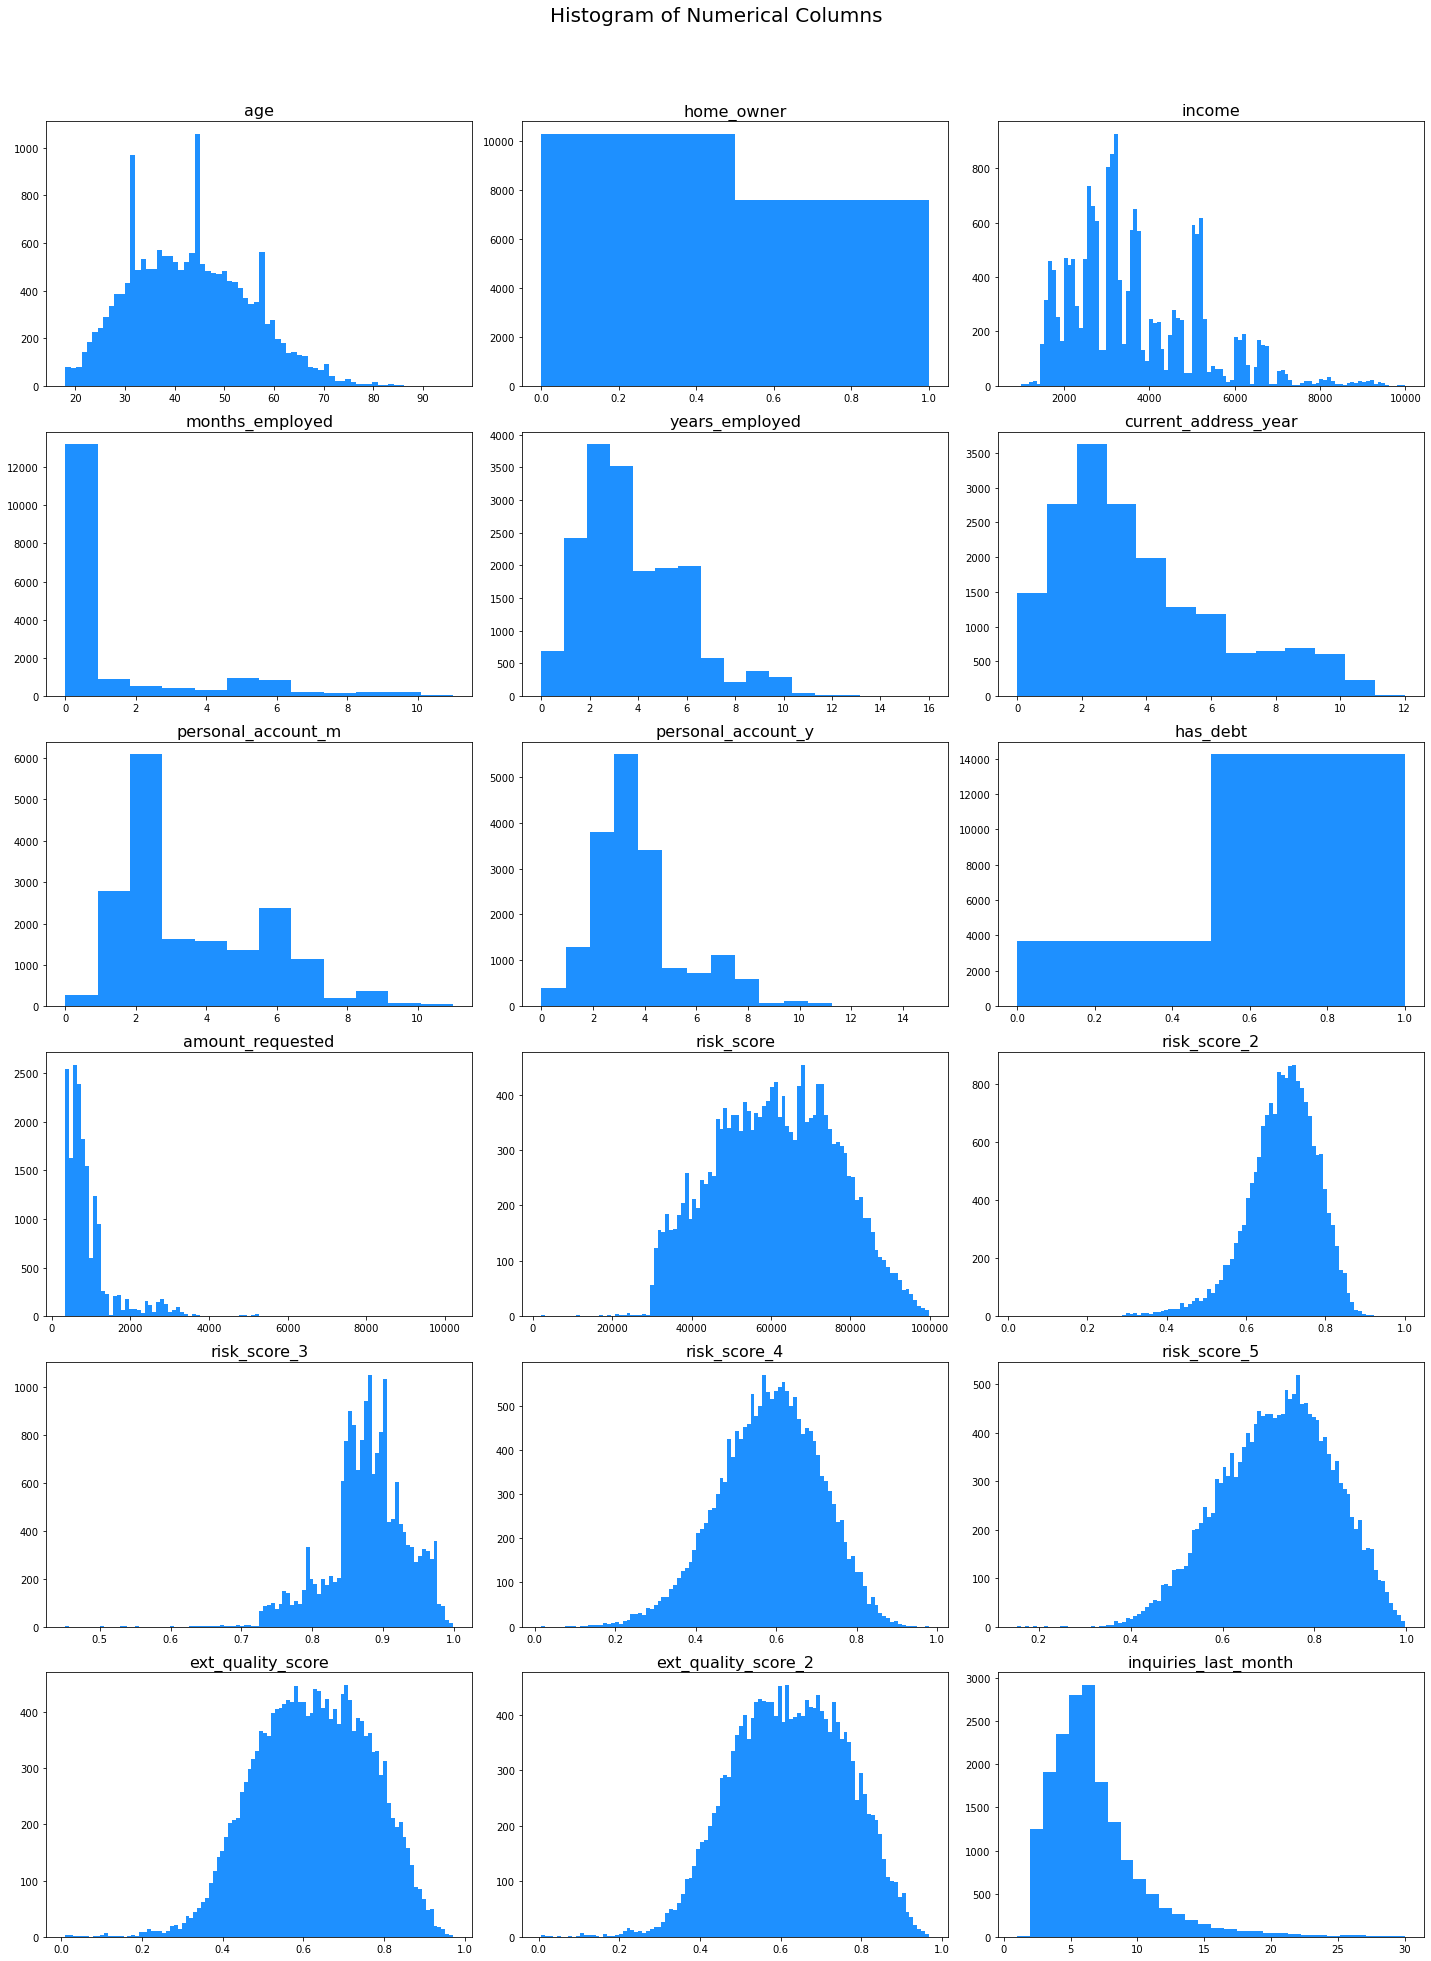

In [9]:
fig = plt.figure(figsize=(20,40))
plt.suptitle('Histogram of Numerical Columns', fontsize=20)
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i+1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i], fontsize = 16)
    
    vals = np.size(dataset2.iloc[:,i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset2.iloc[:,i], bins = vals, color = 'dodgerblue')
plt.tight_layout(rect=[0, 0.3, 1, 0.95])

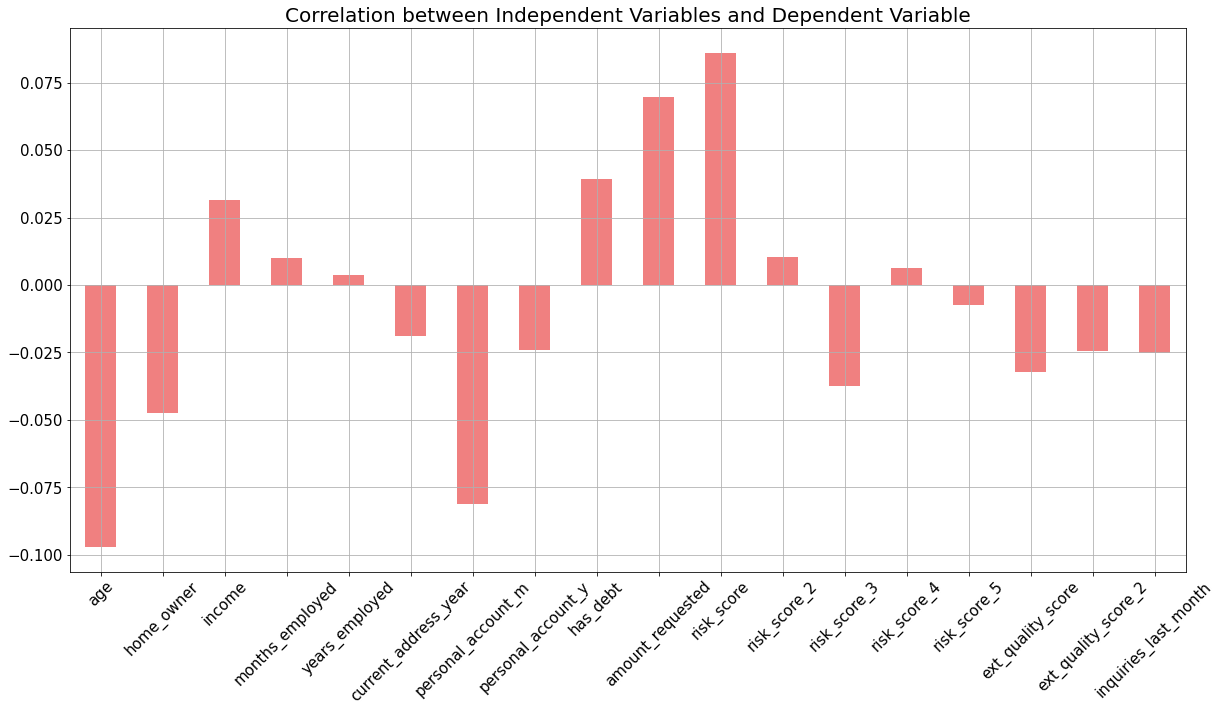

In [10]:
# correlation between features and the target
dataset2.corrwith(dataset['e_signed']).plot(kind = 'bar',
                                          figsize=(20,10),
                                          color = 'lightcoral',
                                          fontsize = 15,
                                          rot = 45,
                                          grid = True
                                          )
plt.title('Correlation between Independent Variables and Dependent Variable', fontsize=20)
plt.show()

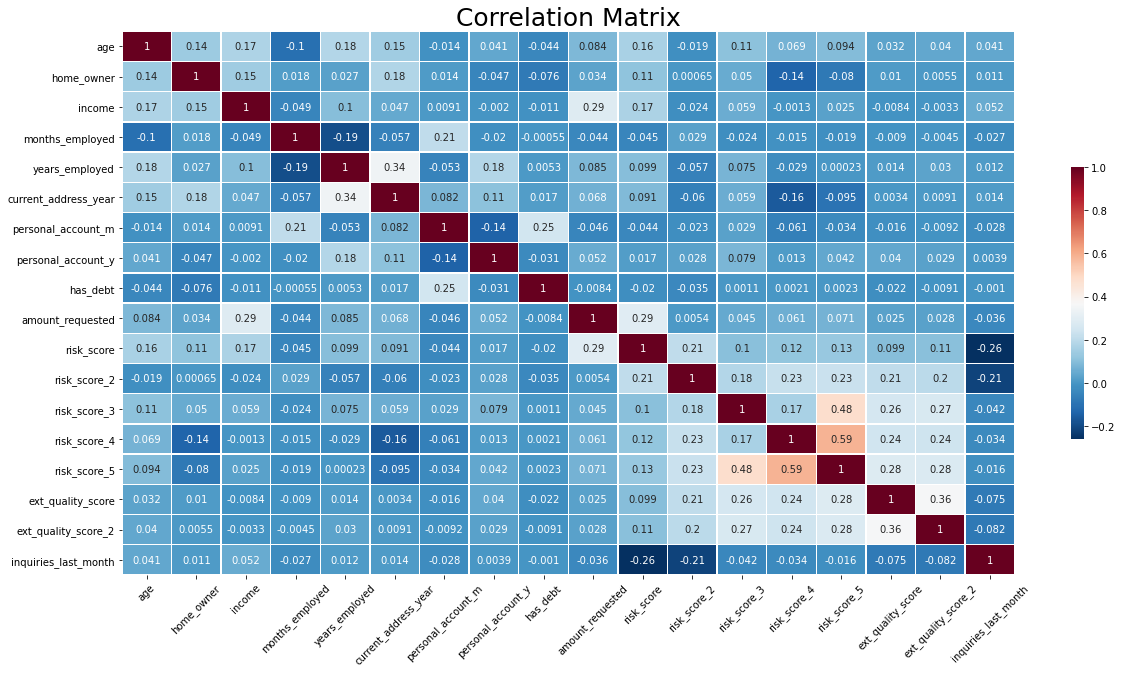

In [11]:
# correlation matrix between the features
plt.figure(figsize=(20,10))
sns.heatmap(dataset2.corr(), 
            annot=True, 
            linewidths=.5, 
            cmap="RdBu_r",
            annot_kws={"size":10},
            cbar_kws={'shrink':.5}
           )
plt.xticks(rotation=45)
plt.title('Correlation Matrix', fontsize=25)
plt.show()

## Step 4. Data Preprocessing

In [12]:
import random
import time
random.seed(100)

In [13]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


### Feature Engineering

#### Deleting unwanted Columns and Making a New Column from it

In [14]:
dataset = dataset.drop(columns=['months_employed'])
dataset['personal_account_months'] = dataset['personal_account_m'] + (dataset['personal_account_y'] * 12)
dataset[['personal_account_months','personal_account_m','personal_account_y']].head()

,personal_account_months,personal_account_m,personal_account_y
0,30,6,2
1,86,2,7
2,19,7,1
3,86,2,7
4,98,2,8


In [15]:
dataset = dataset.drop(columns=['personal_account_m','personal_account_y'])
dataset.head(10)

,entry_id,age,pay_schedule,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months
0,7629673,40,bi-weekly,1,3135,3,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,30
1,3560428,61,weekly,0,3180,6,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,86
2,6934997,23,weekly,0,1540,0,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,19
3,5682812,40,bi-weekly,0,5230,6,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,86
4,5335819,33,semi-monthly,0,3590,5,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,98
5,8492423,21,weekly,0,2303,5,8,1,600,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1,86
6,7948313,26,bi-weekly,0,2795,4,4,1,800,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1,73
7,4297036,43,bi-weekly,0,5000,2,1,1,1100,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1,25
8,6493191,32,semi-monthly,0,5260,0,3,1,1150,64050,0.652429,0.802433,0.593816,0.560389,0.569459,0.369459,3,1,49
9,8908605,51,bi-weekly,1,3055,6,11,1,600,59750,0.624666,0.968565,0.509919,0.749624,0.758607,0.758607,5,1,28


### Reordering the Columns in the Dataframe

In [16]:
dataset.columns.values

array(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'years_employed', 'current_address_year', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed',
       'personal_account_months'], dtype=object)

In [17]:
dataset = dataset[['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'years_employed', 'personal_account_months','current_address_year', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed']]

In [18]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,years_employed,personal_account_months,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,3,30,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,6,86,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,0,19,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,6,86,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,5,98,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


### Defining Variables with Independent Features and Dependent Features

In [19]:
X = dataset.iloc[:,2:-1].values
y = dataset.iloc[:,-1].values

In [20]:
X

array([['bi-weekly', 1, 3135, ..., 0.580918, 0.380918, 10],
       ['weekly', 0, 3180, ..., 0.73072, 0.63072, 9],
       ['weekly', 0, 1540, ..., 0.531712, 0.531712, 7],
       ...,
       ['weekly', 0, 2685, ..., 0.472045, 0.672045, 9],
       ['bi-weekly', 0, 2515, ..., 0.406568, 0.406568, 3],
       ['weekly', 1, 2665, ..., 0.8461629999999999, 0.8461629999999999,
        4]], dtype=object)

In [21]:
y

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

### Encoding Categorical Data

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [23]:
X

array([[1.0, 0.0, 0.0, ..., 0.580918, 0.380918, 10],
       [0.0, 0.0, 0.0, ..., 0.73072, 0.63072, 9],
       [0.0, 0.0, 0.0, ..., 0.531712, 0.531712, 7],
       ...,
       [0.0, 0.0, 0.0, ..., 0.472045, 0.672045, 9],
       [1.0, 0.0, 0.0, ..., 0.406568, 0.406568, 3],
       [0.0, 0.0, 0.0, ..., 0.8461629999999999, 0.8461629999999999, 4]],
      dtype=object)

### Splitting the Dataset into the Training set and Test set

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

### Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Step 5. Training the Model

### 1 - Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [27]:
y_pred = classifier.predict(X_test)

#### Confusion Matrix & Accuracy

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n',cm)
print('\nAccuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)))
print('\nClassification Report: \n',classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 573 1081]
 [ 533 1395]]

Accuracy: 0.55%

Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.35      0.42      1654
           1       0.56      0.72      0.63      1928

    accuracy                           0.55      3582
   macro avg       0.54      0.53      0.52      3582
weighted avg       0.54      0.55      0.53      3582



### 2 - SVM (Linear)

In [29]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [30]:
y_pred = classifier.predict(X_test)

#### Confusion Matrix & Accuracy

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n',cm)
print('\nAccuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)))
print('\nClassification Report: \n',classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 470 1184]
 [ 433 1495]]

Accuracy: 0.55%

Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.28      0.37      1654
           1       0.56      0.78      0.65      1928

    accuracy                           0.55      3582
   macro avg       0.54      0.53      0.51      3582
weighted avg       0.54      0.55      0.52      3582



### 3 - SVM (rbf)

In [32]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

In [33]:
y_pred = classifier.predict(X_test)

#### Confusion Matrix & Accuracy

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n',cm)
print('\nAccuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)))
print('\nClassification Report: \n',classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 721  933]
 [ 563 1365]]

Accuracy: 0.58%

Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.44      0.49      1654
           1       0.59      0.71      0.65      1928

    accuracy                           0.58      3582
   macro avg       0.58      0.57      0.57      3582
weighted avg       0.58      0.58      0.57      3582



### 4 - Random Forest(n=100)

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0,n_estimators=100,criterion='entropy')
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [36]:
y_pred = classifier.predict(X_test)

#### Confusion Matrix & Accuracy

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n',cm)
print('\nAccuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)))
print('\nClassification Report: \n',classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 918  736]
 [ 642 1286]]

Accuracy: 0.62%

Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.56      0.57      1654
           1       0.64      0.67      0.65      1928

    accuracy                           0.62      3582
   macro avg       0.61      0.61      0.61      3582
weighted avg       0.61      0.62      0.61      3582



## Step 6. K-fold Cross Validation

In [38]:
from  sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier,
                     X = X_train,
                     y = y_train,
                     cv =10,
                     n_jobs=-1
                     )
print("Average Mean Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("\nStandard Deviation of this Accuracy: {:.2f}%".format(accuracies.std()*100))

Average Mean Accuracy: 61.96%

Standard Deviation of this Accuracy: 1.45%


## Step  7. Improving the Model

### Grid Search

In [39]:
from sklearn.model_selection import GridSearchCV
parameters = { 'criterion':['entropy'], 
               'max_depth':[1, None],
               'max_features':[1, 5, 10],
               'min_samples_split':[2, 5, 10],
               'min_samples_leaf':[1, 5, 10],
               'bootstrap':[True, False]
              }
gs = GridSearchCV(estimator=classifier,
                 param_grid=parameters,
                 cv = 10,
                 n_jobs=-1,
                 scoring='accuracy'
                 )
gs = gs.fit(X_train,y_train)

#### Best Accuracy Score:

In [40]:
best_accuracy = gs.best_score_
best_accuracy

0.6283022977930426

#### Best Parameters:

In [41]:
best_params = gs.best_params_
best_params

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

#### Prediction

In [42]:
y_pred = gs.predict(X_test)

#### Confusion Matrix & Accuracy

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n',cm)
print('\nAccuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)))
print('\nClassification Report: \n',classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 965  689]
 [ 587 1341]]

Accuracy: 0.64%

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.58      0.60      1654
           1       0.66      0.70      0.68      1928

    accuracy                           0.64      3582
   macro avg       0.64      0.64      0.64      3582
weighted avg       0.64      0.64      0.64      3582



## Fully Model Developed !!!